In [ ]:
from skimage import io, feature, color
from skimage.transform import resize
from skimage.filters import gaussian
from skimage.feature import greycomatrix, greycoprops
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import learning_curve

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import os
import pandas as pd
from skimage.feature import greycomatrix, greycoprops
from skimage.filters import gabor
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **PREPROCESSING STAGE**

Data Augmenation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory path containing all image folders
dir_path = '/content/drive/My Drive/Colab Notebooks/Final Year Project/Train'
# Create a list of all image folder names
folder_names = os.listdir(dir_path)

# Set the path to the directory where the processed images will be saved
augmented_dir = "/content/drive/My Drive/Colab Notebooks/Final Year Project/Train_Augmented2"

valid_extensions = ['.jpg', '.png', '.jpeg']

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Loop over all the original images in the directory
for folder_name in folder_names:
    folder_path = os.path.join(dir_path, folder_name)
    for filename in os.listdir(folder_path):
        if any(filename.endswith(ext) for ext in valid_extensions):
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path)
             # Apply data augmentation to the image
            augmented_images = datagen.flow(np.expand_dims(img, axis=0), batch_size=1)

            max_augmented_images = 5  # Set the desired number of augmented images per original image augmented_2_WalKohila_ (25)
            filename = filename[:-4]

             # Loop over the augmented images
            for i, augmented_image in enumerate(augmented_images):
              # Save the processed image to the output directory
              save_path = os.path.join(augmented_dir, f"{filename}_augmented_{i}.jpg")
              cv2.imwrite(save_path, augmented_image[0])
              # Check if the desired number of augmented images is reached
              if i + 1 == max_augmented_images:
                break



**# Step 11: Data pre-processing**

In [ ]:
# Define the directory path containing all image folders
dir_path = '/content/drive/My Drive/Colab Notebooks/Final Year Project/Train'

# Create a list of all image folder names
folder_names = os.listdir(dir_path)

In [ ]:
# Set the path to the directory where the processed images will be saved
output_dir = "/content/drive/My Drive/Colab Notebooks/Final Year Project/PreProcessed_01"


In [ ]:
# Read and resize images from each folder
images = []
image_paths = []
valid_extensions = ['.jpg', '.png', '.jpeg']

for folder_name in folder_names:
    folder_path = os.path.join(dir_path, folder_name)
    for filename in os.listdir(folder_path):
        if any(filename.endswith(ext) for ext in valid_extensions):
            image_path = os.path.join(folder_path, filename)

            image = cv2.resize(cv2.imread(image_path), (256, 256))

            # Apply color transformation to remove noise
            image_rgb=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            #converts images rgb_images to gray
            gray_image= cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
            #to normalized
            normalized_img= cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)
            #to apply meddian filter
            blurred_img=cv2.medianBlur(normalized_img, 3)
            #to increase contrast
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            preprocessed_img = clahe.apply(blurred_img)

            images.append(preprocessed_img)
            image_name = f"{folder_name}_{filename}"
            image_paths.append(os.path.join(folder_path))
            # Add the modified image path to the list
            # Save the processed image to the output directory
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, preprocessed_img)

To visualize datset original images

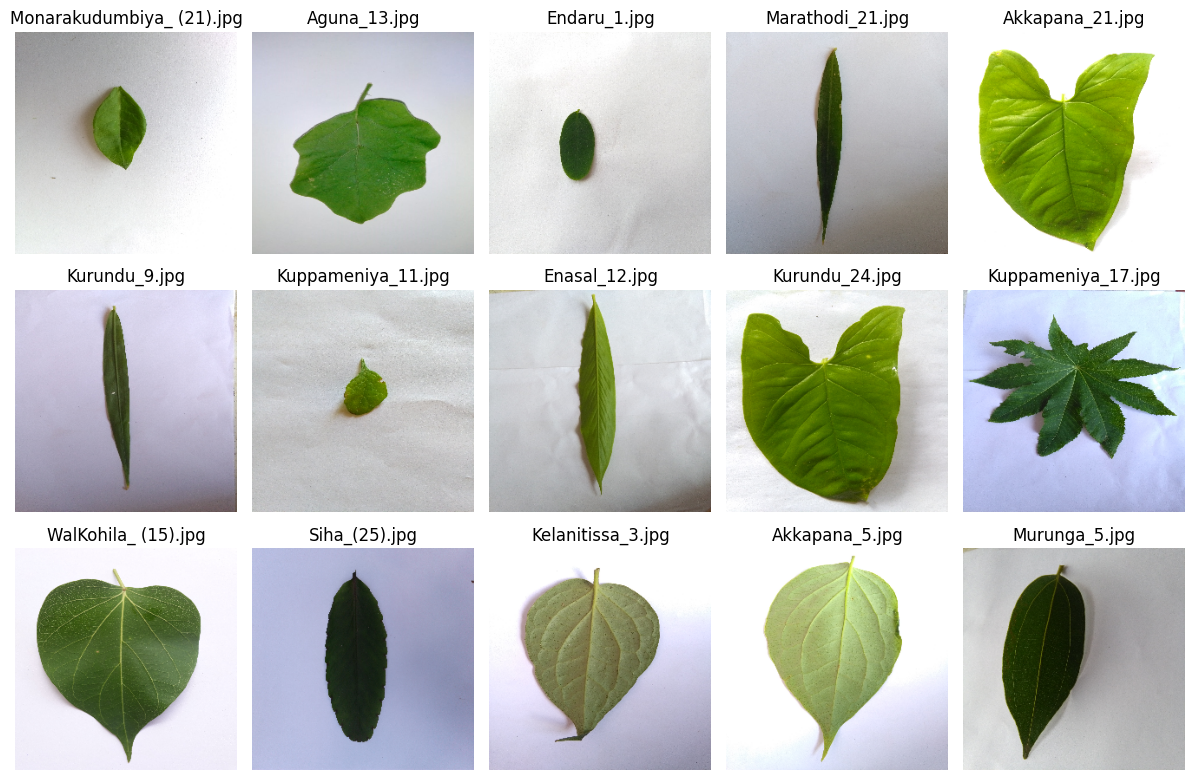

In [ ]:
import matplotlib.pyplot as plt

# Select 15 images from the list
selected_images = images[:15]
selected_image_paths = image_paths[:15]

# Plot the selected images
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
axes = axes.ravel()

for i, image in enumerate(selected_images):
    axes[i].imshow(image)
    random_index = random.randint(0, len(images)-1)
    selected_image = images[random_index]
    selected_image_path = image_paths[random_index]
    axes[i].set_title(selected_image_paths[i].split("/")[-1])  # Extract filename from the path
    axes[i].axis('off')

plt.tight_layout()
plt.show()


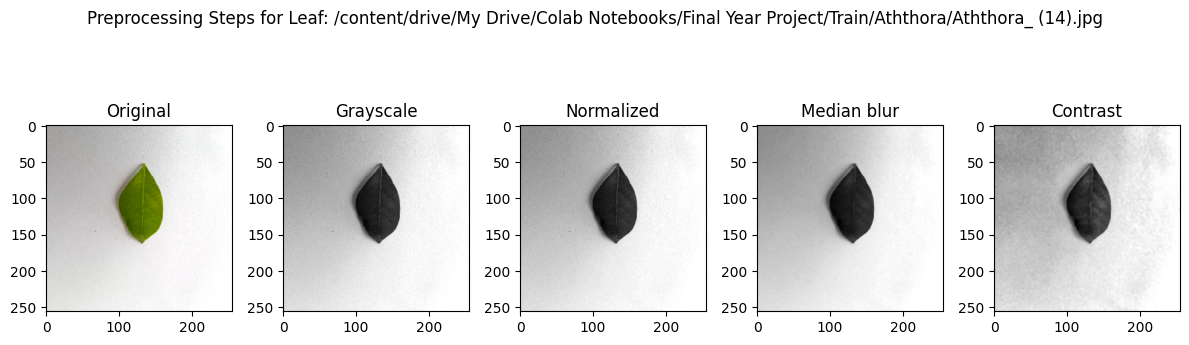

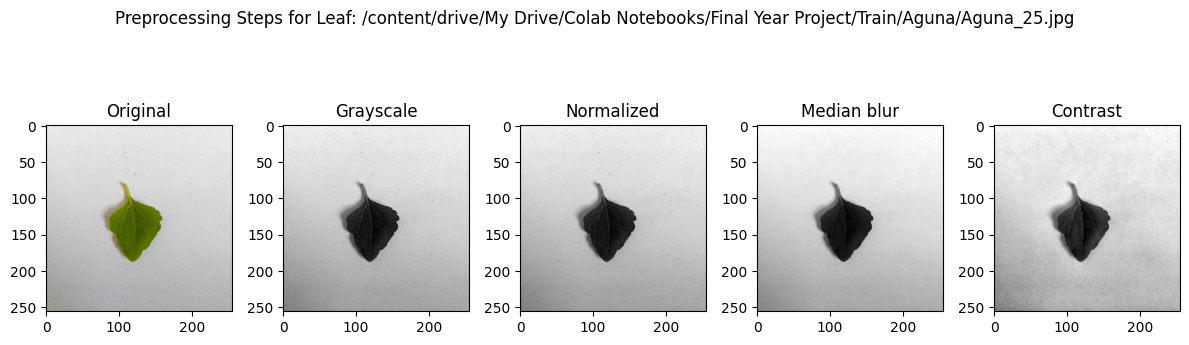

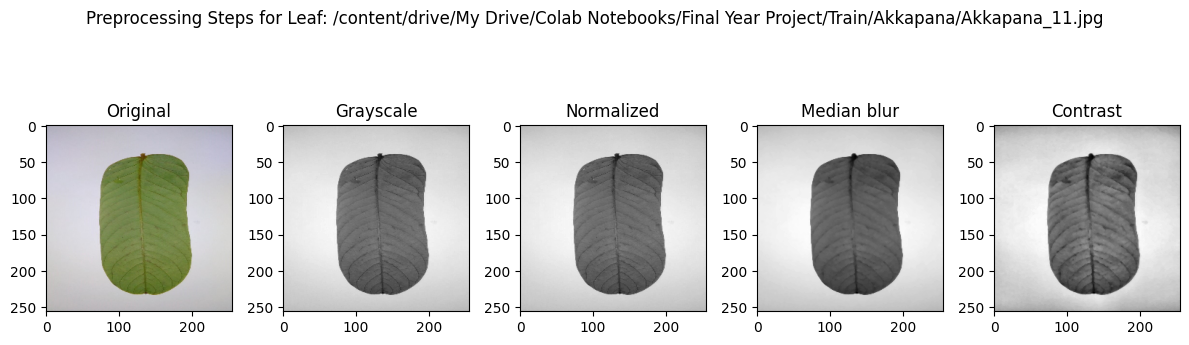

In [ ]:
import matplotlib.pyplot as plt
import random

# select 10 random indices from the images list
random_indices = random.sample(range(len(images)), 3)

for i in random_indices:

  # Select a random plant leaf image and its path
  random_index = random.randint(0, len(images)-1)
  selected_image = images[random_index]
  selected_image_path = image_paths[random_index]

  # Apply preprocessing steps to the selected image
  image_rgb = cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB)
  gray_image= cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
  normalized_img = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)
  blurred_img=cv2.medianBlur(normalized_img, 3)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  preprocessed_img = clahe.apply(blurred_img)

  # Display the grayscale, thresholded, closed, and eroded images
  fig, axes = plt.subplots(1, 5, figsize=(12, 4))

  axes[0].imshow(selected_image)
  axes[0].set_title("Original")

  axes[1].imshow(gray_image, cmap='gray')
  axes[1].set_title("Grayscale")

  axes[2].imshow(normalized_img, cmap='gray')
  axes[2].set_title("Normalized")

  axes[3].imshow(blurred_img, cmap='gray')
  axes[3].set_title("Median blur")

  axes[4].imshow(preprocessed_img, cmap='gray')
  axes[4].set_title("Contrast")

  plt.suptitle(f"Preprocessing Steps for Leaf: {selected_image_path}")
  plt.tight_layout()
  plt.show()


**Step 02 = Feature Extractions**

In [ ]:
# Set the path to the directory where the CSV file will be saved
output_dir2 = "/content/drive/My Drive/Colab Notebooks/Final Year Project/"


# Set the names of the Ayurveda plants you want to identify
plants = ["Aguna","Aththora","Akkapana","Delum","Elabatu","Endaru","Ensal","Iguru","Kelanithissa","Kuppameniya","Kurudu","Marathodi","Monarakudumbi","Ranawara","Siha", "WalKohila", "Hulanthala","Murunga"]

# Define a function to extract features from an image
def extract_features(img):
    # Define feature vectors to store the extracted features
    glcm_features = np.zeros((1, 5))
    gabor_features = np.zeros((1, 12))
    histogram_features = np.zeros((1, 256))
    moments_features = np.zeros((1, 8))

    # Compute GLCM features
    glcm = greycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    glcm_features[0, 0] = greycoprops(glcm, 'dissimilarity')[0, 0]
    glcm_features[0, 1] = greycoprops(glcm, 'correlation')[0, 0]
    glcm_features[0, 2] = greycoprops(glcm, 'energy')[0, 0]
    glcm_features[0, 3] = greycoprops(glcm, 'homogeneity')[0, 0]
    glcm_features[0, 4] = greycoprops(glcm, 'ASM')[0, 0]

    # Compute Gabor filter features
    for i, theta in enumerate([0, np.pi/4, np.pi/2, 3*np.pi/4]):
        for j, frequency in enumerate([0.1, 0.2, 0.3]):
            real, imag = gabor(img, frequency=frequency, theta=theta)
            magnitude = np.sqrt(real**2 + imag**2)
            gabor_features[0, i*3+j] = magnitude.mean()

    # Compute histogram features
    histogram_features[0] = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()

    # Compute moments features
    moments = cv2.moments(img)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = hu_moments[:6] # truncate to 6 elements
    moments_features[0, 0] = skew(img.flatten())
    moments_features[0, 1] = kurtosis(img.flatten())
    moments_features[0, 2:] = hu_moments


    # Concatenate all the feature vectors into a single feature vector
    features = np.concatenate((glcm_features, gabor_features, histogram_features, moments_features), axis=1)

    return features

In [ ]:
# Set the directory containing preprocessed images
preprocessed_dir = "/content/drive/My Drive/Colab Notebooks/Final Year Project/PreProcess"

# Initialize empty lists to store the features and plant names
features_list = []
plant_names = []

# Loop over all the preprocessed images in the directory
for filename in os.listdir(preprocessed_dir):
    if filename.endswith('.jpg'):
        # Read the image
        img = cv2.imread(os.path.join(preprocessed_dir, filename), cv2.IMREAD_GRAYSCALE)

        # Extract the features from the image
        features = extract_features(img)

        # Add the features to the list
        features_list.append(features)

        # Extract the plant name from the filename
        plant_name = filename.split('_')[0]
        plant_names.append(plant_name)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0

In [ ]:
# Convert the features and plant names to a Pandas DataFrame
feature_names = ['glcm_dissimilarity', 'glcm_correlation', 'glcm_energy', 'glcm_homogeneity', 'glcm_ASM']
feature_names.append('plant_name')
for i in range(4):
    for j in range(3):
        feature_names.append('gabor_{}_{}'.format(i, j))
for i in range(255):
    feature_names.append('histogram_{}'.format(i))
feature_names.append('skew')
feature_names.append('kurtosis')
for i in range(6):
    feature_names.append('hu_{}'.format(i+1))


In [ ]:
print(len(features_list), len(feature_names))

3200 281


In [ ]:
# Convert the features and plant names to a Pandas DataFrame
features_df = pd.DataFrame(np.concatenate(features_list), columns=feature_names)
features_df['Plant'] = plant_names

# Save the features to a CSV file
output_file = "/content/drive/My Drive/Colab Notebooks/Final Year Project/features_01_final.csv"
features_df.to_csv(output_file, index=False)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Year Project/features_01_final.csv")

In [ ]:
data.shape

(3200, 282)

In [ ]:
data.describe()

,glcm_dissimilarity,glcm_correlation,glcm_energy,glcm_homogeneity,glcm_ASM,plant_name,gabor_0_0,gabor_0_1,gabor_0_2,gabor_1_0,...,histogram_253,histogram_254,skew,kurtosis,hu_1,hu_2,hu_3,hu_4,hu_5,hu_6
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,...,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03
mean,3.061671,0.989043,0.099880,0.419117,0.042744,0.515082,0.269914,0.156530,0.455105,0.250153,...,143.305313,4151.854062,-1.860580,4.364601,0.000933,2.115250e-09,2.113338e-12,6.247917e-12,-2.149245e-23,-2.619288e-16
std,0.947891,0.004127,0.181047,0.135318,0.159383,0.323051,0.154534,0.088661,0.354066,0.180362,...,378.112695,12754.652991,1.154733,7.571222,0.000126,4.096888e-09,4.813470e-12,1.175107e-11,3.327862e-22,1.212121e-15
min,0.184651,0.970103,0.019109,0.228962,0.000365,0.076233,0.041687,0.022736,0.008484,0.009262,...,0.000000,0.000000,-12.901187,-1.753751,0.000656,3.959761e-14,9.629084e-18,1.361708e-15,-8.257186e-21,-3.578335e-14
25%,2.413492,0.987058,0.032609,0.320085,0.001063,0.263367,0.154633,0.091370,0.183197,0.113678,...,0.000000,0.000000,-2.492815,-0.478461,0.000845,2.244116e-10,2.768005e-13,1.231164e-12,-5.713553e-24,-1.641456e-16
50%,3.024732,0.989588,0.044609,0.398934,0.001990,0.408569,0.222717,0.130249,0.334106,0.199463,...,0.000000,0.000000,-1.661829,2.170906,0.000909,8.838642e-10,1.010125e-12,2.807229e-12,-1.400386e-25,-3.421120e-17
75%,3.601582,0.992176,0.065492,0.487338,0.004289,0.710083,0.359924,0.206787,0.629761,0.346008,...,32.000000,22.000000,-0.938223,6.621183,0.001007,2.343923e-09,2.465912e-12,6.393035e-12,8.644339e-25,-1.022990e-18
max,6.280668,0.997361,0.987195,0.989814,0.974553,1.831055,0.973633,0.532227,1.891602,0.983398,...,3615.000000,64774.000000,0.118431,168.077167,0.001557,7.082223e-08,1.202003e-10,1.873522e-10,5.921639e-21,7.457639e-15


In [ ]:
data.isnull().any()

glcm_dissimilarity    False
glcm_correlation      False
glcm_energy           False
glcm_homogeneity      False
glcm_ASM              False
                      ...  
hu_3                  False
hu_4                  False
hu_5                  False
hu_6                  False
Plant                 False
Length: 282, dtype: bool

In [ ]:
data['Plant'].isnull().any()

False

In [ ]:
# To check columns have null values
for col in data.columns:
  if(data[col].isnull().any()):
   print(col)

In [ ]:
# Checking for duplicate vlues
print(data.duplicated().value_counts())

False    3200
dtype: int64


In [ ]:
#data.shape
data.head(10)

,glcm_dissimilarity,glcm_correlation,glcm_energy,glcm_homogeneity,glcm_ASM,plant_name,gabor_0_0,gabor_0_1,gabor_0_2,gabor_1_0,...,histogram_254,skew,kurtosis,hu_1,hu_2,hu_3,hu_4,hu_5,hu_6,Plant
3190,3.505852,0.991881,0.028536,0.278765,0.000814,0.273193,0.187744,0.117737,0.068359,0.094177,...,0.0,-1.142991,0.986566,0.000925,1.876506e-09,1.992271e-12,7.077089e-12,-1.216879e-23,-3.065612e-16,Marathodi
3191,3.680653,0.989099,0.028470,0.279609,0.000811,0.344238,0.285400,0.161133,0.251221,0.218750,...,0.0,-1.484482,2.243715,0.000899,2.905274e-09,4.954517e-12,4.412001e-12,-1.808553e-23,-2.328942e-16,Marathodi
3192,3.537209,0.988947,0.031457,0.280792,0.000990,0.251953,0.212036,0.119934,0.301758,0.227661,...,0.0,-1.885755,3.681028,0.000855,2.450600e-09,2.951533e-12,3.546212e-12,-3.057596e-24,-1.593503e-16,Marathodi
3193,3.256127,0.986867,0.031020,0.293217,0.000962,0.168579,0.146362,0.090698,0.106079,0.106018,...,0.0,-1.722327,4.740146,0.000861,1.207338e-09,1.949843e-12,2.131467e-12,2.975937e-24,-4.684594e-17,Marathodi
3194,3.199341,0.986765,0.029570,0.297486,0.000874,0.163208,0.153931,0.095459,0.119019,0.116821,...,0.0,-1.539275,3.977142,0.000882,1.899436e-09,2.890255e-12,2.059779e-12,-1.945514e-24,-7.744285e-17,Marathodi
3195,3.190395,0.986442,0.037682,0.298476,0.001420,0.178101,0.165283,0.097778,0.080261,0.093994,...,0.0,-2.352305,7.531303,0.000808,2.010440e-09,1.890693e-12,1.247636e-12,-1.275642e-24,-5.109916e-17,Marathodi
3196,3.023989,0.984788,0.041585,0.308597,0.001729,0.173462,0.148682,0.090149,0.142456,0.131714,...,0.0,-3.070864,12.874947,0.000810,1.357422e-09,2.065317e-12,8.880666e-13,-9.739499e-25,-3.173730e-17,Marathodi
3197,3.105055,0.985469,0.037117,0.308760,0.001378,0.166748,0.151733,0.094604,0.164429,0.143433,...,0.0,-2.320859,7.994321,0.000833,1.562278e-09,2.047034e-12,1.300273e-12,3.321475e-25,-3.999627e-17,Marathodi
3198,2.456633,0.993458,0.246703,0.477283,0.060862,0.128174,0.110657,0.072693,0.238159,0.165649,...,16633.0,-1.204486,2.395943,0.000810,1.052367e-09,2.148273e-12,3.594749e-12,7.634355e-24,-7.897817e-17,Marathodi
3199,2.076195,0.992455,0.422181,0.590905,0.178237,0.187622,0.159302,0.096069,0.138062,0.114136,...,28128.0,-2.182052,6.036015,0.000733,1.863660e-09,2.186405e-12,1.852592e-12,-2.225224e-24,-7.648472e-17,Marathodi


# **Step 03 = Classifiction**

In [ ]:
import cv2
import numpy as np
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load the extracted features from CSV file
features_file = "/content/drive/My Drive/Colab Notebooks/Final Year Project/features_01_final.csv"
df = pd.read_csv(features_file)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Plant', axis=1), df['Plant'], test_size=0.2, random_state=42)

SVM classsifier

In [ ]:
# Encode the plant names as integers
le = LabelEncoder()
df['Plant'] = le.fit_transform(df['Plant'])


# Train a SVM classifier
clf = SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train.values, y_train)

# Evaluate the classifier
y_pred_svm = clf.predict(X_test)
target_names = list(le.classes_.astype(str))
print(classification_report(y_test, y_pred_svm, target_names=target_names))

# Save the trained model
joblib.dump(clf, 'model.joblib')


# Predict labels for training and test set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy for training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Determine if there is a significant difference between the two accuracies
if test_accuracy < train_accuracy:
    difference = train_accuracy - test_accuracy
    print("The test accuracy is lower than the training accuracy by", difference)
else:
    print("The test accuracy is not significantly lower than the training accuracy.")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.63      0.54      0.58        35
           2       0.73      0.81      0.77        37
           3       0.92      0.92      0.92        25
           4       0.76      0.76      0.76        29
           5       0.88      0.92      0.90        38
           6       0.83      1.00      0.91        34
           7       0.79      0.72      0.75        36
           8       0.80      0.77      0.78        26
           9       0.88      0.89      0.88        56
          10       0.81      0.78      0.79        27
          11       0.94      0.88      0.91        33
          12       0.89      0.89      0.89        47
          13       0.90      0.96      0.93        49
          14       0.71      0.87      0.78        23
          15       0.98      0.94      0.96        51
          16       0.89      0.77      0.83        31
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
# Split the data into features and labels
X = df.drop("Plant", axis=1)
y = df["Plant"]

# Initialize the SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)

# Perform cross-validation
scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-Validation Scores: [0.871875  0.8515625 0.8140625 0.8609375 0.8046875]
Average Accuracy: 0.840625


In [ ]:
# Load the saved model
model = joblib.load('model.joblib')

# Load and preprocess the input image
image=cv2.imread('/content/drive/My Drive/Colab Notebooks/Final Year Project/input/Aguna_26.jpg')
resized_image = cv2.resize(image, (256, 256))

# Apply color transformation to remove noise
image_rgb=cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
#converts images rgb_images to gray
gray_image= cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
#to normalized
normalized_img= cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)
#to apply meddian filter
blurred_img=cv2.medianBlur(normalized_img, 3)
#to increase contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
preprocessed_img = clahe.apply(blurred_img)

img=extract_features(preprocessed_img)


# Predict the class of the test image
predicted_class = model.predict(img)

print("Predicted class:", predicted_class)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Predicted class: ['Aguna']


In [ ]:
# Load the extracted features from CSV file
features_file = "/content/drive/My Drive/Colab Notebooks/Final Year Project/features_01_final.csv"
df = pd.read_csv(features_file)

# Encode the plant names as integers
le = LabelEncoder()
df['Plant'] = le.fit_transform(df['Plant'])

# Add an "unknown" class to the training data
unknown_class = len(le.classes_)  # Assign the next integer label to the unknown class
df.loc[len(df)] = [0] * len(df.columns)  # Add a row of zeros
df.loc[len(df) - 1, 'Plant'] = unknown_class  # Assign the unknown class label to the new row

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Plant', axis=1), df['Plant'], test_size=0.2, random_state=42)

# Train a SVM classifier
clf = SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train.values, y_train)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# Evaluate the classifier
y_pred = clf.predict(X_test)
target_names = np.append(le.classes_, "Unknown")  # Include the "unknown" class in target_names
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Save the trained model
joblib.dump(clf, 'model.joblib')

# Load the saved model
model = joblib.load('model.joblib')

#load previously preprocessed input image as img
# Predict the class of the test image
predicted_class = model.predict(img)

# Map the predicted class back to the original plant names
predicted_plant = le.inverse_transform(predicted_class)[0]

if predicted_plant == unknown_class:
    print("The input leaf does not belong to any known plant class.")
else:
    print("Predicted class:", predicted_plant)


Cross-Validation Scores: [0.871875  0.8515625 0.8140625 0.8609375 0.8046875]
Average Accuracy: 0.840625
                 precision    recall  f1-score   support

          Aguna       1.00      1.00      1.00        31
       Akkapana       0.56      0.62      0.59        32
       Aththora       0.83      0.81      0.82        36
          Delum       0.79      0.94      0.86        16
        Elabatu       0.82      0.88      0.85        32
         Enasal       0.81      0.92      0.86        38
         Endaru       0.86      1.00      0.92        36
     Hulanthala       0.87      0.77      0.82        35
         Inguru       0.88      0.74      0.81        31
    Kelanitissa       0.88      0.91      0.90        47
    Kuppameniya       0.89      0.77      0.83        31
        Kurundu       0.96      0.86      0.91        29
      Marathodi       0.89      0.91      0.90        45
Monarakudumbiya       0.96      0.95      0.96        58
        Murunga       0.81      0.86    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


2. RandomForestClassifier

In [ ]:
# Load the extracted features from CSV file
features_file = "/content/drive/My Drive/Colab Notebooks/Final Year Project/features_01_final.csv"
df = pd.read_csv(features_file)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("Plant", axis=1), df["Plant"], test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf, 'rfmodel.joblib')

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Random Forest Classifier : {accuracy}")

# Calculate precision, recall, and F1-score
classification_report_RF =classification_report(y_test, y_pred)
print("Classification Report RF:\n" ,classification_report_RF)

# Predict labels for training and test set
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate accuracy for training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Determine if there is a significant difference between the two accuracies
if test_accuracy < train_accuracy:
    difference = train_accuracy - test_accuracy
    print("The test accuracy is lower than the training accuracy by", difference)
else:
    print("The test accuracy is not significantly lower than the training accuracy.")

Accuracy Random Forest Classifier : 0.9875
Classification Report RF:
                  precision    recall  f1-score   support

          Aguna       1.00      1.00      1.00        33
       Akkapana       0.97      0.94      0.96        35
       Aththora       1.00      1.00      1.00        37
          Delum       1.00      0.96      0.98        25
        Elabatu       1.00      1.00      1.00        29
         Enasal       1.00      1.00      1.00        38
         Endaru       0.97      1.00      0.99        34
     Hulanthala       1.00      1.00      1.00        36
         Inguru       1.00      1.00      1.00        26
    Kelanitissa       0.98      0.98      0.98        56
    Kuppameniya       0.96      1.00      0.98        27
        Kurundu       0.97      1.00      0.99        33
      Marathodi       0.98      0.98      0.98        47
Monarakudumbiya       0.98      1.00      0.99        49
        Murunga       0.96      0.96      0.96        23
       Ranawara  

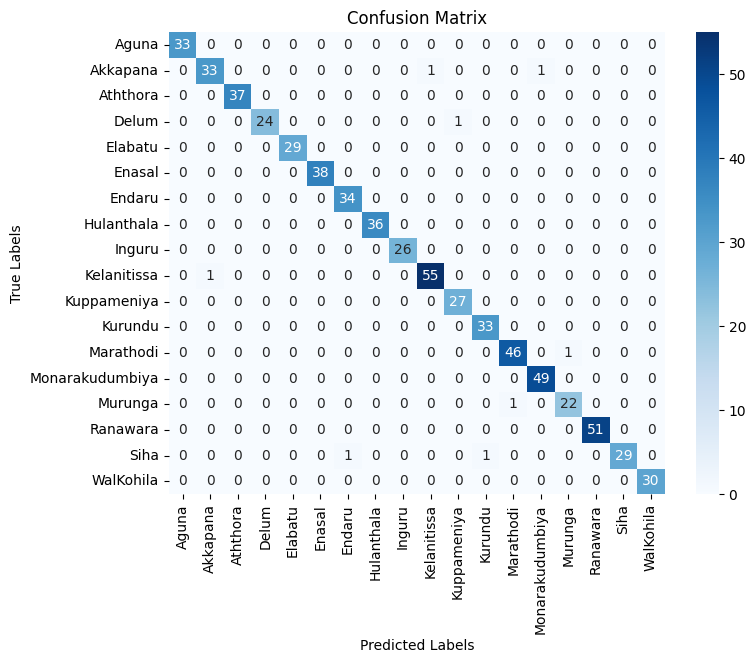

In [ ]:
# Generate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Create a list of class labels
class_labels = sorted(set(y_test))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

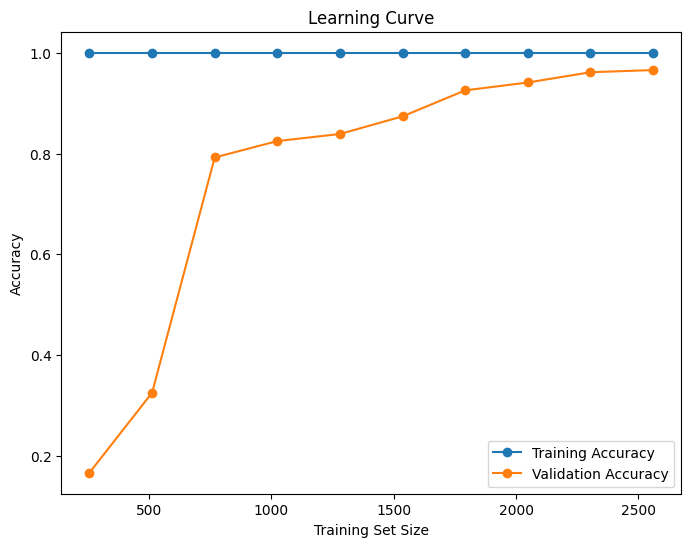

In [ ]:
# Plot the learning curve
train_sizes, train_scores, val_scores = learning_curve(rf, df.drop("Plant", axis=1), df["Plant"], cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Accuracy')
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [ ]:
# Split the data into features and labels
X = df.drop("Plant", axis=1)
y = df["Plant"]

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores for Random Forest Classifier :", scores)
print("Average Accuracy:", scores.mean())


Cross-Validation Scores for Random Forest Classifier : [0.9734375 0.975     0.9640625 0.9484375 0.9671875]
Average Accuracy: 0.9656249999999998


In [ ]:
# Load the extracted features from CSV file
Detais_file = "/content/drive/My Drive/Colab Notebooks/Final Year Project/FinalLableSetwithusage.csv"
data2 = pd.read_csv(Detais_file)

In [ ]:
# Load the trained model
model = joblib.load('rfmodel.joblib')

# Load and preprocess the input image
image=cv2.imread('/content/drive/My Drive/Colab Notebooks/Final Year Project/input/Ranawara_26.jpg')
resized_image = cv2.resize(image, (256, 256))

# Apply color transformation to remove noise
image_rgb=cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
#converts images rgb_images to gray
gray_image= cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
#to normalized
normalized_img= cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)
#to apply meddian filter
blurred_img=cv2.medianBlur(normalized_img, 3)
#to increase contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
preprocessed_img = clahe.apply(blurred_img)

# Extract features from the input image
# Use the same feature extraction technique that you used during training
features= extract_features(preprocessed_img)

# Predict the class label of the new input plant leaf image
predicted_class = model.predict(features)

# Print the predicted class
print(f"Predicted class: {predicted_class}")



/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Predicted class: ['Ranawara']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


KNN  Classifiers

In [ ]:
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Save the trained model
joblib.dump(knn, 'knnmodel.joblib')

# Make predictions on the testing set using KNN classifier
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

# Calculate precision, recall, and F1-score
print(classification_report(y_test, y_pred_knn))



# Predict labels for training and test set
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate accuracy for training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Determine if there is a significant difference between the two accuracies
if test_accuracy < train_accuracy:
    difference = train_accuracy - test_accuracy
    print("The test accuracy is lower than the training accuracy by", difference)
else:
    print("The test accuracy is not significantly lower than the training accuracy.")

KNN Accuracy: 0.859375
                 precision    recall  f1-score   support

          Aguna       0.97      1.00      0.99        33
       Akkapana       0.93      0.71      0.81        35
       Aththora       0.82      0.84      0.83        37
          Delum       0.95      0.84      0.89        25
        Elabatu       0.88      0.79      0.84        29
         Enasal       0.87      0.89      0.88        38
         Endaru       0.74      1.00      0.85        34
     Hulanthala       0.89      0.67      0.76        36
         Inguru       0.85      0.85      0.85        26
    Kelanitissa       0.83      0.95      0.88        56
    Kuppameniya       0.82      0.67      0.73        27
        Kurundu       0.96      0.82      0.89        33
      Marathodi       0.86      0.91      0.89        47
Monarakudumbiya       0.96      1.00      0.98        49
        Murunga       0.59      0.87      0.70        23
       Ranawara       0.96      0.86      0.91        51
       

In [ ]:
# Load the trained model
model = joblib.load('knnmodel.joblib')

# Load and preprocess the input image
image=cv2.imread('/content/drive/My Drive/Colab Notebooks/Final Year Project/input/Ranawara_26.jpg')
resized_image = cv2.resize(image, (256, 256))

# Apply color transformation to remove noise
image_rgb=cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
#converts images rgb_images to gray
gray_image= cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
#to normalized
normalized_img= cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)
#to apply meddian filter
blurred_img=cv2.medianBlur(normalized_img, 3)
#to increase contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
preprocessed_img = clahe.apply(blurred_img)

# Extract features from the input image
# Use the same feature extraction technique that you used during training
features= extract_features(preprocessed_img)

# Predict the class label of the new input plant leaf image
predicted_class = model.predict(features)

# Print the predicted class
print(f"Predicted class: {predicted_class}")


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Predicted class: ['Ranawara']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Save the trained model
joblib.dump(dt, 'dtmodel.joblib')

# Make predictions on the testing set using Decision Tree classifier
y_pred_dt = dt.predict(X_test)

# Calculate the accuracy of the Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))


# Load the trained model
model = joblib.load('dtmodel.joblib')
# Extract features from the input image
# Use the same feature extraction technique that you used during training
features= extract_features(preprocessed_img)

# Predict the class label of the new input plant leaf image
predicted_class = model.predict(features)

# Print the predicted class
print(f"Predicted class: {predicted_class}")



# Predict labels for training and test set
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy for training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Determine if there is a significant difference between the two accuracies
if test_accuracy < train_accuracy:
    difference = train_accuracy - test_accuracy
    print("The test accuracy is lower than the training accuracy by", difference)
else:
    print("The test accuracy is not significantly lower than the training accuracy.")


Decision Tree Accuracy: 0.8859375
                 precision    recall  f1-score   support

          Aguna       0.97      0.97      0.97        33
       Akkapana       0.78      0.71      0.75        35
       Aththora       0.81      0.70      0.75        37
          Delum       0.91      0.84      0.87        25
        Elabatu       0.79      0.93      0.86        29
         Enasal       0.88      0.95      0.91        38
         Endaru       1.00      0.94      0.97        34
     Hulanthala       0.80      0.78      0.79        36
         Inguru       0.83      0.77      0.80        26
    Kelanitissa       0.91      0.93      0.92        56
    Kuppameniya       0.80      0.89      0.84        27
        Kurundu       0.91      0.94      0.93        33
      Marathodi       0.88      0.89      0.88        47
Monarakudumbiya       0.96      0.96      0.96        49
        Murunga       0.91      0.91      0.91        23
       Ranawara       0.96      1.00      0.98       

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Predicted class: ['Ranawara']
Training Accuracy: 1.0
Test Accuracy: 0.8859375
The test accuracy is lower than the training accuracy by 0.11406249999999996


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


LogisticRegression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
# Create a Logistic Regression model and train it
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Save the trained model
joblib.dump(lr, 'lrmodel.joblib')

# Make predictions on the testing set
y_pred_lr= lr.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f" LogisticRegression Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_lr))



# Predict labels for training and test set
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy for training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Determine if there is a significant difference between the two accuracies
if test_accuracy < train_accuracy:
    difference = train_accuracy - test_accuracy
    print("The test accuracy is lower than the training accuracy by", difference)
else:
    print("The test accuracy is not significantly lower than the training accuracy.")


 LogisticRegression Accuracy: 0.85625
                 precision    recall  f1-score   support

          Aguna       0.97      1.00      0.99        33
       Akkapana       0.48      0.34      0.40        35
       Aththora       0.77      0.81      0.79        37
          Delum       0.91      0.84      0.87        25
        Elabatu       0.82      0.79      0.81        29
         Enasal       0.83      0.76      0.79        38
         Endaru       0.80      0.94      0.86        34
     Hulanthala       0.72      0.58      0.65        36
         Inguru       0.81      0.65      0.72        26
    Kelanitissa       0.83      0.89      0.86        56
    Kuppameniya       0.72      0.78      0.75        27
        Kurundu       0.90      0.85      0.88        33
      Marathodi       0.80      0.94      0.86        47
Monarakudumbiya       0.76      0.86      0.81        49
        Murunga       0.53      0.70      0.60        23
       Ranawara       0.92      0.90      0.91   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Load the trained model
model = joblib.load('lrmodel.joblib')

# Extract features from the input image
# Use the same feature extraction technique that you used during training
features= extract_features(preprocessed_img)

# Predict the class label of the new input plant leaf image
predicted_class = model.predict(features)

# Print the predicted class
print(f"Predicted class: {predicted_class}")


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Predicted class: ['Ranawara']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


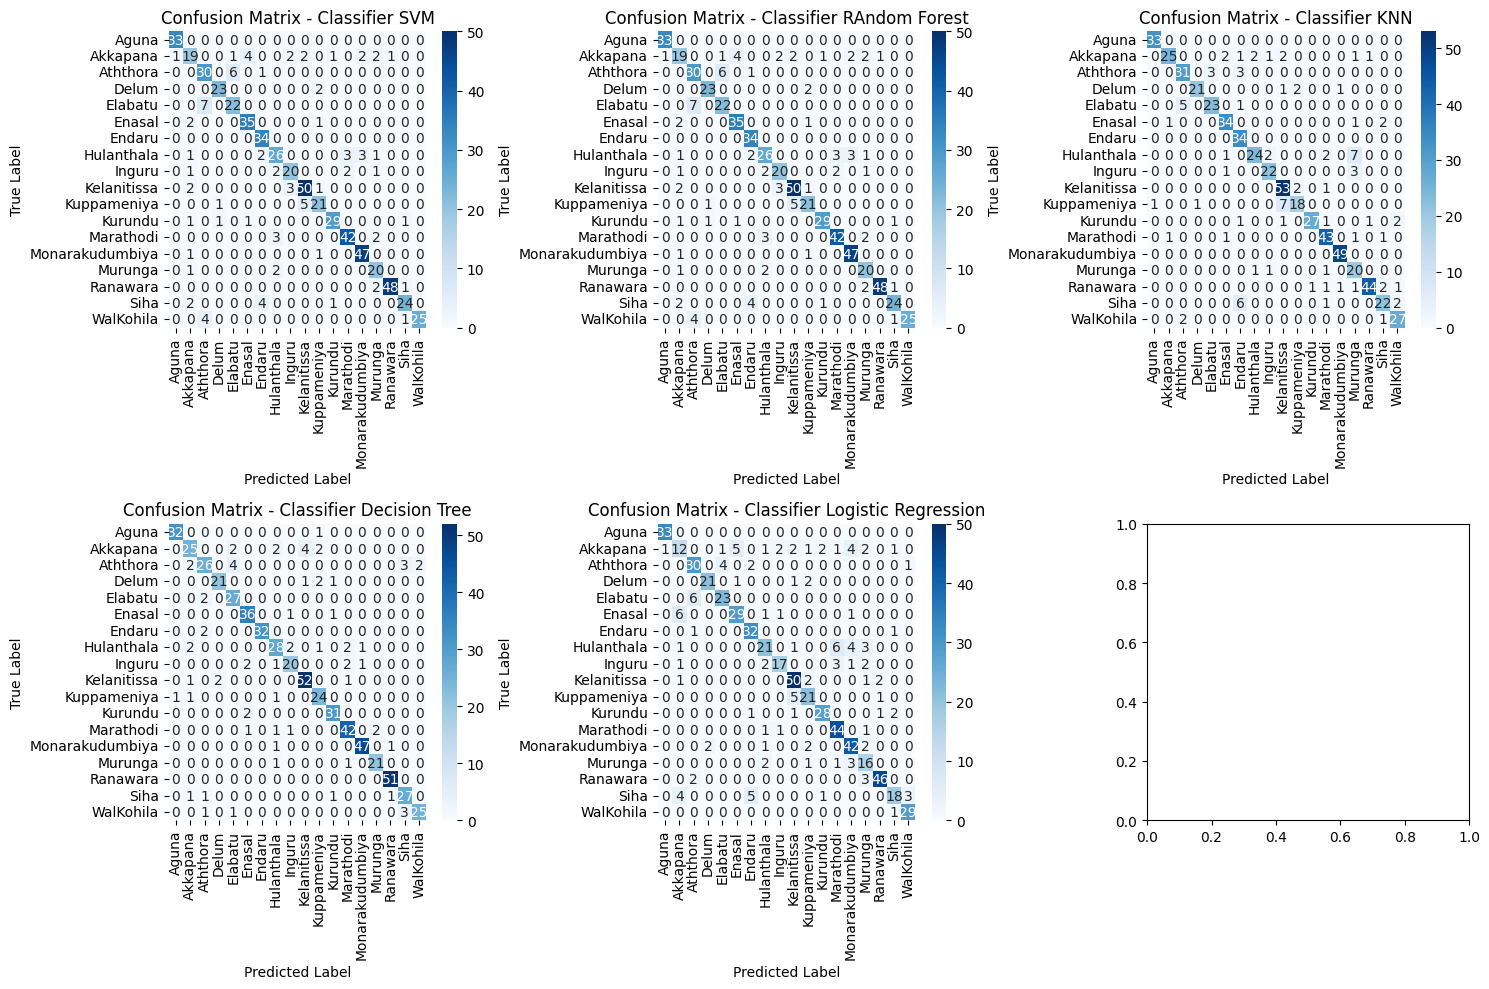

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


classifiers = ['Classifier SVM', 'Classifier RAndom Forest', 'Classifier KNN', 'Classifier Decision Tree', 'Classifier Logistic Regression']
labels = np.unique(y_test)  # Assuming the true labels are the same for all classifiers

# Calculate confusion matrix for each classifier
cm_classifier1 = confusion_matrix(y_test, y_pred_svm, labels=labels)
cm_classifier2 = confusion_matrix(y_test, y_pred, labels=labels)
cm_classifier3 = confusion_matrix(y_test, y_pred_knn, labels=labels)
cm_classifier4 = confusion_matrix(y_test, y_pred_dt, labels=labels)
cm_classifier5 = confusion_matrix(y_test, y_pred_lr, labels=labels)

# Plotting the confusion matrices
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, cm, classifier in zip(range(5), [cm_classifier1, cm_classifier2, cm_classifier3, cm_classifier4, cm_classifier5], classifiers):
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels, ax=axs[i])
    axs[i].set_title(f'Confusion Matrix - {classifier}')
    axs[i].set_xlabel('Predicted Label')
    axs[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [ ]:
clf_accuracy=[86.00, 98.75, 85.9375, 88.59375, 80.00]
clf_accuracy=np.around(clf_accuracy , 3)
clf_accuracy

array([86.   , 98.75 , 85.938, 88.594, 80.   ])

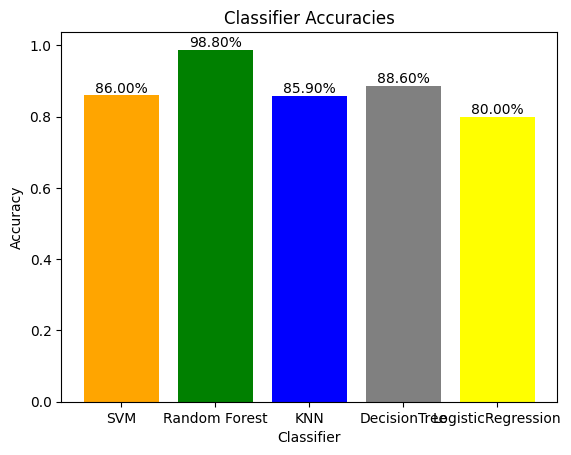

In [ ]:
import matplotlib.pyplot as plt

# Define the classifiers and their corresponding accuracies
classifiers=['SVM','Random Forest','KNN', 'DecisionTree', 'LogisticRegression' ]
clf_accuracy=[0.86, 0.9875, 0.859375, 0.8859375, 0.80]
clf_accuracy=np.around(clf_accuracy , 3)
clf_accuracy

# Define colors for each bar
colors = ['orange', 'green', 'blue', 'grey', 'yellow']

# Create a bar plot
plt.bar(classifiers, clf_accuracy, color=colors)

# Add labels and title
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')

# Add percentage values on top of each bar
for i, acc in enumerate(clf_accuracy):
    plt.text(i, acc, f'{acc:.2%}', ha='center', va='bottom')
# Show the plot
plt.show()


Data Augmentation to increase data

In [ ]:
!pip install --upgrade tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Define the directory path containing all image folders
augmented_dir = '/content/drive/My Drive/Colab Notebooks/Final Year Project/Train_Augmented'

# Create a list of all image folder names
folder_names = os.listdir(augmented_dir)

# Set the path to the directory where the processed images will be saved
output_dir2 = "/content/drive/My Drive/Colab Notebooks/Final Year Project/PreProcess"

In [ ]:
# Read and resize images from each folder
images = []
image_paths = []
valid_extensions = ['.jpg', '.png', '.jpeg']

for filename in os.listdir(augmented_dir):
    if any(filename.endswith(ext) for ext in valid_extensions):
        image_path = os.path.join(augmented_dir, filename)
        image = cv2.resize(cv2.imread(image_path), (256, 256))

        # Apply color transformation to remove noise
        image_rgb=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #converts images rgb_images to gray
        gray_image= cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
        #to normalized
        normalized_img= cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)
        #to apply meddian filter
        blurred_img=cv2.medianBlur(normalized_img, 3)
        #to increase contrast
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        preprocessed_img = clahe.apply(blurred_img)

        images.append(preprocessed_img)
        #image_name = f"{folder_name}_{filename}"
        #image_paths.append(os.path.join(folder_path))  # Add the modified image path to the list
        # Save the processed image to the output directory
        output_path = os.path.join(output_dir2, filename)
        cv2.imwrite(output_path, preprocessed_img)

In [ ]:
# Set the directory containing preprocessed images
preprocessed_dir = "/content/drive/My Drive/Colab Notebooks/Final Year Project/PreProcess"

# Initialize empty lists to store the features and plant names
features_list = []
plant_names = []

# Loop over all the preprocessed images in the directory
for filename in os.listdir(preprocessed_dir):
    if filename.endswith('.jpg'):
        # Read the image
        img = cv2.imread(os.path.join(preprocessed_dir, filename), cv2.IMREAD_GRAYSCALE)

        # Extract the features from the image
        features = extract_features(img)

        # Add the features to the list
        features_list.append(features)

        # Extract the plant name from the filename
        plant_name = filename.split('_')[0]
        plant_names.append(plant_name)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0

In [ ]:
# Convert the features and plant names to a Pandas DataFrame
feature_names = ['glcm_dissimilarity', 'glcm_correlation', 'glcm_energy', 'glcm_homogeneity', 'glcm_ASM']
feature_names.append('plant_name')
for i in range(4):
    for j in range(3):
        feature_names.append('gabor_{}_{}'.format(i, j))
for i in range(255):
    feature_names.append('histogram_{}'.format(i))
feature_names.append('skew')
feature_names.append('kurtosis')
for i in range(6):
    feature_names.append('hu_{}'.format(i+1))

In [ ]:
print(len(features_list), len(feature_names))

2710 281


In [ ]:
# Convert the features and plant names to a Pandas DataFrame
features_df = pd.DataFrame(np.concatenate(features_list), columns=feature_names)
features_df['Plant'] = plant_names

# Save the features to a CSV file
output_file = "/content/drive/My Drive/Colab Notebooks/Final Year Project/features_02_final.csv"
features_df.to_csv(output_file, index=False)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Year Project/features_02_final.csv")

In [ ]:
data.head(10)

,glcm_dissimilarity,glcm_correlation,glcm_energy,glcm_homogeneity,glcm_ASM,plant_name,gabor_0_0,gabor_0_1,gabor_0_2,gabor_1_0,...,histogram_254,skew,kurtosis,hu_1,hu_2,hu_3,hu_4,hu_5,hu_6,Plant
0,2.649157,0.995258,0.068062,0.474025,0.004632,0.387939,0.200317,0.123840,0.593262,0.290771,...,0.0,-1.011161,-0.838562,0.000940,1.264230e-08,7.231659e-12,2.268977e-11,-2.727133e-22,-2.545215e-15,Aguna
1,4.220374,0.992026,0.060014,0.393544,0.003602,0.806152,0.494629,0.308838,0.494385,0.377441,...,23.0,-0.290792,-1.739460,0.001217,1.986525e-09,6.509964e-13,4.447800e-11,4.956952e-23,-6.899541e-16,Aguna
2,3.673085,0.992982,0.068351,0.424693,0.004672,0.808594,0.443848,0.281494,0.790527,0.421631,...,2.0,-0.724077,-1.393489,0.001142,5.981438e-09,1.542319e-12,3.564487e-11,-2.409320e-22,-2.754418e-15,Aguna
3,3.667816,0.993447,0.066264,0.434407,0.004391,0.680176,0.397461,0.258545,0.455078,0.314697,...,976.0,-0.571689,-1.559969,0.001209,4.153258e-10,6.792066e-13,1.178776e-11,-1.240431e-23,-2.400654e-16,Aguna
4,3.930913,0.993307,0.065238,0.422591,0.004256,0.573730,0.379150,0.244385,0.524414,0.393555,...,39.0,-0.532733,-1.559938,0.001168,7.363595e-10,5.692639e-13,2.583577e-11,-9.897072e-23,-5.305770e-16,Aguna
5,3.687316,0.993423,0.061797,0.426783,0.003819,0.797363,0.455811,0.283691,0.683105,0.415771,...,511.0,-0.479831,-1.629681,0.001195,7.335550e-10,5.539108e-14,3.002401e-11,2.966439e-23,-6.687938e-16,Aguna
6,4.013909,0.992627,0.068202,0.413739,0.004652,0.729492,0.417480,0.259521,0.550781,0.356689,...,58.0,-0.508280,-1.583410,0.001184,2.086350e-09,4.256441e-13,6.011976e-12,2.943088e-24,-2.356563e-16,Aguna
7,3.520650,0.993625,0.059836,0.412775,0.003580,0.555176,0.341797,0.227051,0.439209,0.280273,...,1.0,-0.736009,-1.324115,0.001136,2.825651e-10,9.552481e-14,2.257555e-11,-1.408090e-23,-3.168993e-16,Aguna
8,3.811458,0.992890,0.056962,0.414562,0.003245,0.633301,0.394287,0.261963,0.933105,0.537598,...,2.0,-0.611559,-1.455286,0.001165,1.845642e-09,5.035906e-13,3.245761e-11,-6.915737e-23,-1.077729e-15,Aguna
9,3.025996,0.994720,0.068459,0.450623,0.004687,0.449707,0.219604,0.138794,0.351318,0.213623,...,0.0,-1.050038,-0.740882,0.001052,1.879401e-09,4.273915e-13,1.541579e-11,-3.775460e-23,-6.561234e-16,Aguna


In [ ]:
import cv2
import numpy as np
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the extracted features from CSV file
features_file = "/content/drive/My Drive/Colab Notebooks/Final Year Project/features_02_final.csv"
df = pd.read_csv(features_file)

# Encode the plant names as integers
le = LabelEncoder()
df['Plant'] = le.fit_transform(df['Plant'])

# Add an "unknown" class to the training data
unknown_class = len(le.classes_)  # Assign the next integer label to the unknown class
df.loc[len(df)] = [0] * len(df.columns)  # Add a row of zeros
df.loc[len(df) - 1, 'Plant'] = unknown_class  # Assign the unknown class label to the new row

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Plant', axis=1), df['Plant'], test_size=0.2, random_state=42)

# Train a SVM classifier
clf = SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train.values, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Save the trained model
joblib.dump(clf, 'model.joblib')

# Load the saved model
model = joblib.load('model.joblib')

# Load and preprocess the input image
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/Final Year Project/input/e.jpg')
resized_image = cv2.resize(image, (256, 256))

# Apply color transformation to remove noise
image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
# Converts images rgb_images to gray
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
# Normalize image
normalized_img = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)
# Apply median filter
blurred_img = cv2.medianBlur(normalized_img, 3)
# Increase contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
preprocessed_img = clahe.apply(blurred_img)

img = extract_features(preprocessed_img)

# Predict the class of the test image
predicted_class = model.predict(img)

# Map the predicted class back to the original plant names
predicted_plant = le.inverse_transform(predicted_class)[0]

if predicted_plant == unknown_class:
    print("The input leaf does not belong to any known plant class.")
else:
    print("Predicted class:", predicted_plant)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib

# Load the extracted features from CSV file
features_file = "/content/drive/My Drive/Colab Notebooks/Final Year Project/features_02_final.csv"
df = pd.read_csv(features_file)

# Encode the plant names as integers
le = LabelEncoder()
df['Plant'] = le.fit_transform(df['Plant'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Plant', axis=1), df['Plant'], test_size=0.2, random_state=42)

# Train a SVM classifier
clf = SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train.values, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Save the trained model
joblib.dump(clf, 'model.joblib')

                 precision    recall  f1-score   support

          Aguna       1.00      1.00      1.00        20
       Akkapana       0.57      0.65      0.61        26
       Aththora       0.76      0.86      0.81        22
          Delum       0.93      0.96      0.94        26
        Elabatu       0.91      0.88      0.89        24
         Enasal       0.95      0.67      0.78        27
         Endaru       0.90      1.00      0.95        27
     Hulanthala       0.74      0.85      0.79        27
         Inguru       0.86      0.83      0.84        23
    Kelanitissa       0.92      0.92      0.92        52
    Kuppameniya       0.90      0.87      0.88        30
        Kurundu       0.94      0.91      0.92        33
      Marathodi       0.91      0.84      0.87        50
Monarakudumbiya       0.95      0.97      0.96        37
        Murunga       0.62      0.73      0.67        22
       Ranawara       0.98      0.95      0.97        44
           Siha       0.91    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


['model.joblib']

In [ ]:
import cv2
import numpy as np
import joblib

# Load the saved model
model = joblib.load('model.joblib')

#img_flattened = img_resized.flatten().reshape(1, -1)

# Load and preprocess the input image
image=cv2.imread('/content/drive/My Drive/Colab Notebooks/Final Year Project/input/h3.jpg')
resized_image = cv2.resize(image, (256, 256))

# Apply color transformation to remove noise
image_rgb=cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
#converts images rgb_images to gray
gray_image= cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
#to normalized
normalized_img= cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)
#to apply meddian filter
blurred_img=cv2.medianBlur(normalized_img, 3)
#to increase contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
preprocessed_img = clahe.apply(blurred_img)

img=extract_features(preprocessed_img)

# Predict the class of the test image
predicted_class = model.predict(img)
# Map the predicted class back to the original plant names
predicted_plant = le.inverse_transform(predicted_class)[0]

print("Predicted class:", predicted_class, predicted_plant )


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Predicted class: [1] Akkapana
